In [1]:
import os

import numpy as np
from PIL import Image

In [2]:
images_dir = "previews"

In [3]:
def get_preview(canvas_size, images_data):
    canvas = Image.new("RGBA", canvas_size)
    for image_data in images_data:
        image = Image.open(os.path.join(images_dir, image_data['image']))
        if 'angle' in image_data.keys():
            image = image.rotate(image_data['angle'], expand=True)
        if 'size' in image_data.keys():
            image = image.resize((image_data['size'], image_data['size']))
        canvas.paste(image, (image_data['left'], image_data['top']))
    return canvas

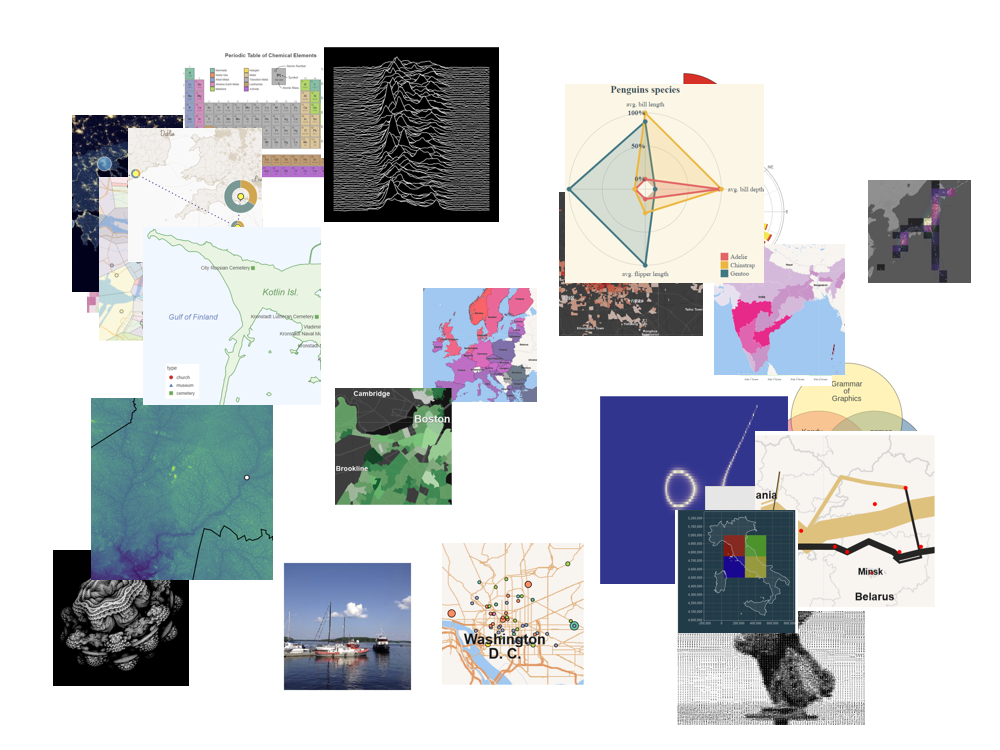

In [4]:
def get_data1(canvas_size, size_range, seed=42):
    np.random.seed(seed)
    def get_image_data(image_name):
        size = np.random.randint(size_range[1] - size_range[0] + 1) + size_range[0]
        left = np.random.randint(canvas_size[0] - size + 1)
        top = np.random.randint(canvas_size[1] - size + 1)
        return dict(image=image_name, size=size, left=left, top=top)
    return [get_image_data(image_name) for image_name in os.listdir(images_dir)]

get_preview((1000, 750), get_data1((1000, 750), (100, 200), seed=0))

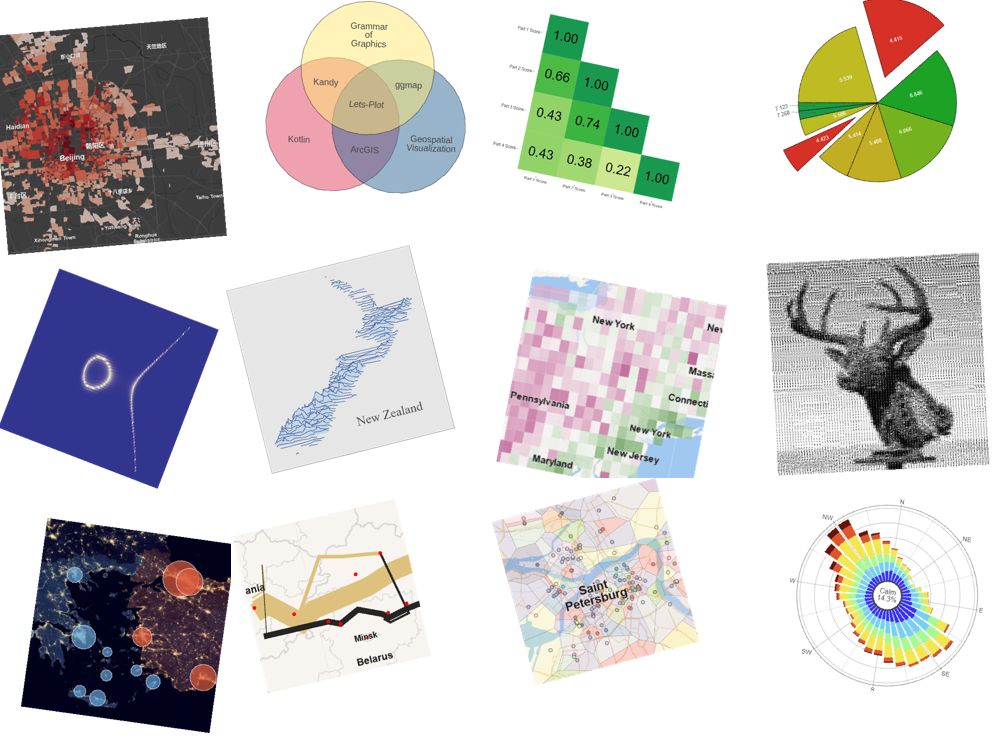

In [5]:
def get_data2(canvas_size, size_range, angle_range, seed=42):
    np.random.seed(seed)
    def get_image_data(image_name, i, j):
        size = np.random.randint(size_range[1] - size_range[0] + 1) + size_range[0]
        angle = int(np.random.randint(angle_range[1] - angle_range[0]) - (angle_range[1] - angle_range[0]) / 2)
        left = int(j * size_range[1] + np.random.randint(size_range[1] - size_range[0]) - (size_range[1] - size_range[0]) / 2)
        top = int(i * size_range[1] + np.random.randint(size_range[1] - size_range[0]) - (size_range[1] - size_range[0]) / 2)
        return dict(image=image_name, size=size, angle=angle, left=left, top=top)
    rows_count, cols_count = int(canvas_size[1] / size_range[1]), int(canvas_size[0] / size_range[1])
    images = os.listdir(images_dir)[: rows_count * cols_count]
    data = []
    for i in range(rows_count):
        for j in range(cols_count):
            data.append(get_image_data(images[i * cols_count + j], i, j))
    return data

get_preview((1000, 750), get_data2((1000, 750), (200, 250), (0, 45), seed=42))